In [12]:
import networkx as nx
import statistics as st
import numpy as np
from enum import Enum
from collections import deque
from itertools import combinations, chain
from typing import Type, TypeVar
np.set_printoptions(threshold=np.inf)

## State representation

### Full

In [5]:
colors = ['R', 'O', 'G', 'Y', 'B', 'W']
posible_color_pairs = [
    ('R', 'O'),
    ('R', 'G'),
    ('R', 'Y'),
    ('R', 'W'),
    ('O', 'G'),
    ('O', 'Y'),
    ('O', 'B'),
    ('G', 'B'),
    ('G', 'W'),
    ('Y', 'B'),
    ('Y', 'W'),
    ('B', 'W'),
]
nodes = [f'{c}{s}' for c in colors for s in range(9)]

edges = []

# edges inside side groups
for c in colors:
    for n in [(0,1,2), (3,4,5), (6,7,8), (0,3,6), (1,4,7), (2,5,8)]:
        edges = edges + [(f'{c}{n[0]}', f'{c}{n[1]}'), (f'{c}{n[1]}', f'{c}{n[2]}'),]

# horisontal relations
for i in [('R','W'), ('W','Y'), ('Y','B'), ('B','R')]:
    edges.append((f'{i[0]}2', f'{i[1]}0'))
    edges.append((f'{i[0]}5', f'{i[1]}3'))
    edges.append((f'{i[0]}8', f'{i[1]}6'))

# vertical relations
for i in [('G','W'), ('W','O')]:
    edges.append((f'{i[0]}6', f'{i[1]}0'))
    edges.append((f'{i[0]}7', f'{i[1]}1'))
    edges.append((f'{i[0]}8', f'{i[1]}2'))

edges.append(('O6', 'B8'))
edges.append(('O7', 'B7'))
edges.append(('O8', 'B6'))

edges.append(('B2', 'G0'))
edges.append(('B1', 'G1'))
edges.append(('B0', 'G2'))

# diagonal relations

edges.append(('R0', 'G0'))
edges.append(('R1', 'G3'))
edges.append(('R2', 'G6'))

edges.append(('G2', 'Y2'))
edges.append(('G5', 'Y1'))
edges.append(('G8', 'Y0'))

edges.append(('Y8', 'O8'))
edges.append(('Y7', 'O5'))
edges.append(('Y6', 'O2'))

edges.append(('O6', 'R6'))
edges.append(('O3', 'R7'))
edges.append(('O0', 'R8'))

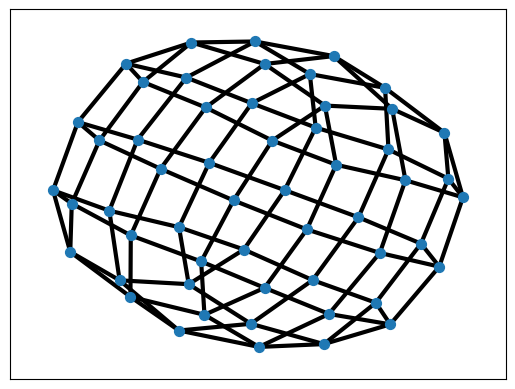

In [6]:
full = nx.Graph()
full.add_nodes_from(nodes)
full.add_edges_from(edges)
nx.draw_networkx(full, node_size=50, width=3.0, with_labels=False)

### Low

In [7]:
low = full.copy()

# horisontal
for i in [('R','W'), ('W','Y'), ('Y','B'), ('B','R')]:
    nx.contracted_nodes(low, f'{i[0]}5', f'{i[1]}3', self_loops=False, copy=False)
    nx.relabel_nodes(low, mapping={f'{i[0]}5': f'{i[0]}5/{i[1]}3'}, copy=False)

# vertical
for i in [('G','W'), ('W','O')]:
    nx.contracted_nodes(low, f'{i[0]}7', f'{i[1]}1', self_loops=False, copy=False)
    nx.relabel_nodes(low, mapping={f'{i[0]}7': f'{i[0]}7/{i[1]}1'}, copy=False)

nx.contracted_nodes(low, 'O7', 'B7', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G1', 'B1', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R7', 'O3', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R1', 'G3', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G5', 'Y1', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O5', 'Y7', self_loops=False, copy=False)
nx.relabel_nodes(
    low,
    mapping={
        'O7': 'O7/B7',
        'G1': 'G1/B1',
        'R7': 'R7/O3',
        'R1': 'R7/G3',
        'G5': 'G5/Y1',
        'O5': 'O5/Y7',
    },
    copy=False
)

# diagonal
nx.contracted_nodes(low, 'R2', 'W0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R2', 'G6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R8', 'W6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R8', 'O0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G8', 'W2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G8', 'Y0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O2', 'W8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O2', 'Y6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G0', 'R0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G0', 'B2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G2', 'Y2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G2', 'B0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O6', 'R6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O6', 'B8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O8', 'Y8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O8', 'B6', self_loops=False, copy=False)

nx.relabel_nodes(
    low,
    mapping={
        'R2': 'R2/W0/G6',
        'R8': 'R8/W6/O0',
        'G8': 'G8/W2/Y0',
        'O2': 'O2/W8/Y6',
        'G0': 'G0/R0/B2',
        'G2': 'G2/Y2/B0',
        'O6': 'O6/R6/B8',
        'O8': 'O8/Y8/B6',
    },
    copy=False
)

In [8]:
list(low.nodes)

['R4',
 'O4',
 'G4',
 'Y4',
 'B4',
 'W4',
 'R5/W3',
 'W5/Y3',
 'Y5/B3',
 'B5/R3',
 'G7/W1',
 'W7/O1',
 'R7/G3',
 'R7/O3',
 'O5/Y7',
 'O7/B7',
 'G1/B1',
 'G5/Y1',
 'R2/W0/G6',
 'R8/W6/O0',
 'O2/W8/Y6',
 'O6/R6/B8',
 'O8/Y8/B6',
 'G0/R0/B2',
 'G2/Y2/B0',
 'G8/W2/Y0']

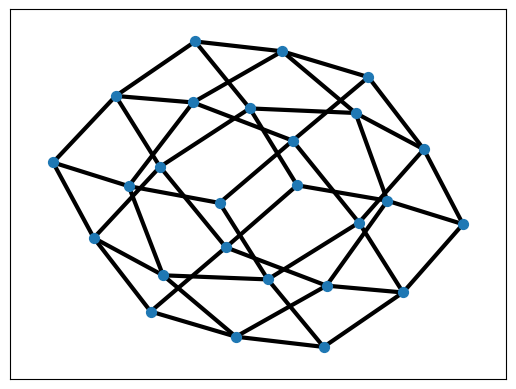

In [9]:
nx.draw_networkx(low, node_size=50, width=3.0, with_labels=False)

### Stats

In [11]:
def met(m: str, f, l) -> str:
    print(f'{m}: full - {f}, low - {l}')

met('Nodes', full.number_of_nodes(), low.number_of_nodes())
met('Edges', full.number_of_edges(), low.number_of_edges())
met('Dencity', nx.density(full), nx.density(low))
met('Diameter', nx.diameter(full), nx.diameter(low))
met('Clustering coef', nx.average_clustering(full), nx.average_clustering(low))
met('Degree', nx.average_degree_connectivity(full), nx.average_degree_connectivity(low))

Nodes: full - 54, low - 26
Edges: full - 108, low - 48
Dencity: full - 0.07547169811320754, low - 0.1476923076923077
Diameter: full - 8, low - 6
Clustering coef: full - 0.07407407407407404, low - 0.0
Degree: full - {4: 4.0}, low - {4: 3.6666666666666665, 3: 4.0}


## Class based

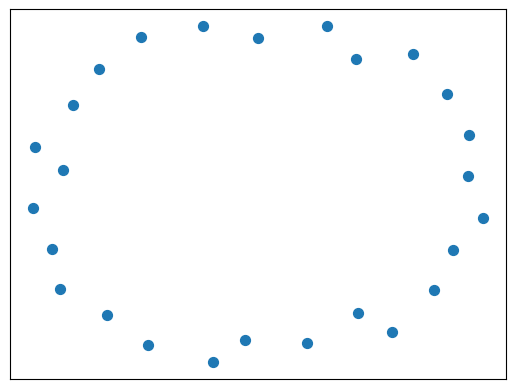

In [16]:
T = TypeVar('T', bound=Enum)


class BaseEnum(Enum):

    @classmethod
    def get_names(cls: Type[T]) -> list[T]:
        return [e for e in cls]

    @classmethod
    def get_values(cls: Type[T]) -> list[int]:
        return [e.value for e in cls]


class BaseStrEnum(str, BaseEnum):

    @classmethod
    def has_value(cls: Type[T], value: str) -> bool:
        return value in cls._value2member_map_

    @classmethod
    def get_values(cls: Type[T]) -> list[str]:
        return [e.value for e in cls]


class ColorsStr(BaseStrEnum):
    B = 'B'
    G = 'G'
    O = 'O'
    R = 'R'
    W = 'W'
    Y = 'Y'
    BG = 'BG'
    BO = 'BO'
    BR = 'BR'
    BY = 'BY'
    GR = 'GR'
    GW = 'GW'
    GY = 'GY'
    OR = 'OR'
    OW = 'OW'
    OY = 'OY'
    RW = 'RW'
    WY = 'WY'
    BGR = 'BGR'
    BGY = 'BGY'
    BOR = 'BOR'
    BOY = 'BOY'
    GRW = 'GRW'
    GWY = 'GWY'
    ORW = 'ORW'
    OWY = 'OWY'


class Colors(BaseEnum):
    B = 25
    G = 9
    O = 13
    R = 11
    W = 24
    Y = 15
    BG = 1
    BO = 5
    BR = 3
    BY = 7
    GR = 10
    GW = 17
    GY = 8
    OR = 12
    OW = 21
    OY = 14
    RW = 19
    WY = 23
    BGR = 2
    BGY = 0
    BOR = 4
    BOY = 6
    GRW = 18
    GWY = 16
    ORW = 20
    OWY = 22


class Dimensions(BaseEnum):
    X = 'X'
    Y = 'Y'
    Z = 'Z'


class Node:

    def __init__(self, color: Colors) -> None:
        self.color = color

    def __hash__(self):
        return hash((type(self),) + tuple(self.__dict__.values()))

    def __eq__(self, __value: object) -> bool:
        return super().__eq__(__value)

    def __repr__(self) -> str:
         return self.color.value


class Layer:

    def __init__(self, map: list[int], graph: nx.MultiDiGraph) -> None:
        self.map = map
        self.graph = graph

    def _map_graph(self) -> None:
        """"""

    def forward(self) -> None:
        labels = [
            self.graph[i]['color']
            for i
            in chain(self.map[2:], self.map[0:2])
        ]
        for n, c in zip(self.map, labels):
            self.graph[n]['color'] = c

    def backward(self) -> None:
        labels = [
            self.graph[i]['color']
            for i
            in chain(self.map[-2:], self.map[0:-2])
        ]
        for n, c in zip(self.map, labels):
            self.graph[n]['color'] = c



class Cube:

    def __init__(self) -> None:
        self.graph = nx.MultiDiGraph()
        self.graph.add_nodes_from(list(range(0, len(Colors))))
        self.reset()

    def rotate_random(self, how_much: int) -> None:
        """
        """

    def reset(self) -> None:
        """Reset cube state to complete
        """
        self.graph.clear_edges()
        self.layer_x1 = Layer(list(range(0,8)), self.graph)
        self.layer_x2 = Layer(list(range(8,16)), self.graph)
        self.layer_x3 = Layer(list(range(16,24)), self.graph)

c = Cube()
nx.draw_networkx(c.graph, node_size=50, width=3.0, with_labels=False)

